<a href="https://colab.research.google.com/github/tgraupmann/TF_ImageScaleUp/blob/main/ImageScaleUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Get the data

import os
data_source = "train_data.zip"
if not os.path.exists("data_source"):
    !wget "https://raw.githubusercontent.com/tgraupmann/TF_ImageScaleUp/main/data/train_data.zip"
else:
    print("[INFO] '" + data_source + "' already exists, skipping download.")

--2022-10-09 04:02:46--  https://raw.githubusercontent.com/tgraupmann/TF_ImageScaleUp/main/data/train_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35218461 (34M) [application/zip]
Saving to: ‘train_data.zip’

train_data.zip      100%[===================>]  33.59M  --.-KB/s    in 0.09s   

2022-10-09 04:02:49 (373 MB/s) - ‘train_data.zip’ saved [35218461/35218461]



In [10]:
# Get helper functions file
import os 

if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")

[INFO] 'helper_functions.py' already exists, skipping download.


In [11]:
# Import series of helper functions for the notebook (we've created/used these in previous notebooks)
from helper_functions import unzip_data

In [12]:
# Remove the old data
!rm -r -f train_data

In [13]:
# Unzip the data
unzip_data(filename="train_data.zip")

# Train AI on a set of blurry images to practice upscaling

In [14]:
# Read image paths
import os
import numpy as np

# Get all training images
def get_training_images(target_folder):
  return os.listdir(target_folder)

def path_combine(path, list):
  result = []
  for i in list:
    result.append(path + i)
  return result

images = get_training_images("train_data/hd/")
hd_images = path_combine("train_data/hd/", images)
blur_images = path_combine("train_data/blur/", images)

labels_training_data = np.column_stack((blur_images, hd_images)).tolist()
len(labels_training_data), labels_training_data[0]

(13,
 ['train_data/blur/20220905_183610.jpg', 'train_data/hd/20220905_183610.jpg'])

In [15]:
# Check if image can load

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# get a random image from the list
def get_random_image(list):
  random_image = random.sample(list, 1)
  return random_image[0]

def show_image_data(img, title):
  plt.imshow(img)
  plt.title(title)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

def show_target_image(target_image):
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_image)
  show_image_data(img=img, title=target_image)
  return img


Image shape: (1080, 1920, 3)
Image shape: (1080, 1920, 3)


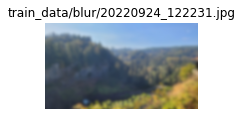

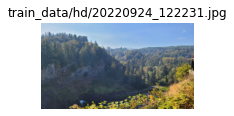

In [17]:
# View a random image from the training dataset

random_image = get_random_image(list=labels_training_data)
random_image

plt.figure()
plt.subplot(1, 2, 1)
img = show_target_image(target_image=random_image[0])

plt.figure()
plt.subplot(1, 2, 2)
img = show_target_image(target_image=random_image[1])

In [18]:
# Read training - image data
import tensorflow as tf
import numpy as np
data_images = []
data_images_blur = []
data_images_hd = []
print("Number of training images: "+str(len(labels_training_data)))
for i in labels_training_data[:5]:
  print(i)
  
  #imgBlur
  print("Read image="+i[0])
  img = tf.io.read_file(i[0])
  imgBlur = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
  print(imgBlur.shape, imgBlur.dtype)
  data_images_blur.append(tf.convert_to_tensor(imgBlur))

  #imgHd
  img = tf.io.read_file(i[1])
  imgHd = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
  print(imgHd.shape, imgHd.dtype)
  data_images_hd.append(tf.convert_to_tensor(imgHd))

  data_images.append(np.array([imgBlur, imgHd]))

data_images_blur = tf.convert_to_tensor(data_images_blur);
print("data_images_blur", data_images_blur.shape, data_images_blur.dtype)

data_images_hd = tf.convert_to_tensor(data_images_hd);
print("data_images_hd", data_images_hd.shape, data_images_hd.dtype)


Number of training images: 13
['train_data/blur/20220905_183610.jpg', 'train_data/hd/20220905_183610.jpg']
Read image=train_data/blur/20220905_183610.jpg
(1080, 1920, 3) <dtype: 'float32'>
(1080, 1920, 3) <dtype: 'float32'>
['train_data/blur/20220924_122241.jpg', 'train_data/hd/20220924_122241.jpg']
Read image=train_data/blur/20220924_122241.jpg
(1080, 1920, 3) <dtype: 'float32'>
(1080, 1920, 3) <dtype: 'float32'>
['train_data/blur/20220924_122231.jpg', 'train_data/hd/20220924_122231.jpg']
Read image=train_data/blur/20220924_122231.jpg
(1080, 1920, 3) <dtype: 'float32'>
(1080, 1920, 3) <dtype: 'float32'>
['train_data/blur/20220909_070225.jpg', 'train_data/hd/20220909_070225.jpg']
Read image=train_data/blur/20220909_070225.jpg
(1080, 1920, 3) <dtype: 'float32'>
(1080, 1920, 3) <dtype: 'float32'>
['train_data/blur/20220924_120315.jpg', 'train_data/hd/20220924_120315.jpg']
Read image=train_data/blur/20220924_120315.jpg
(1080, 1920, 3) <dtype: 'float32'>
(1080, 1920, 3) <dtype: 'float32'>


Image shape: (1080, 1920, 3)
Image shape: (1080, 1920, 3)
Image shape: (1080, 1920, 3)
Image shape: (1080, 1920, 3)
Image shape: (1080, 1920, 3)


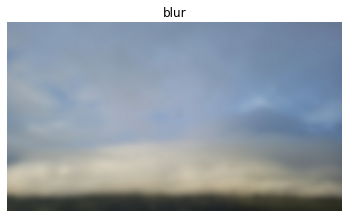

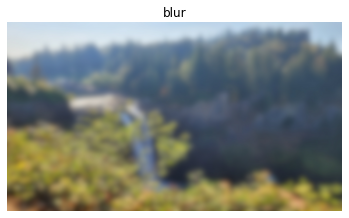

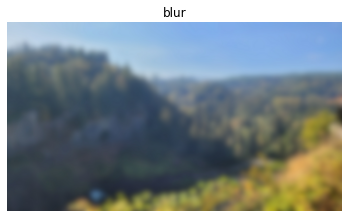

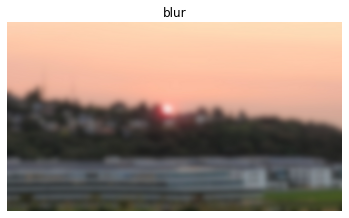

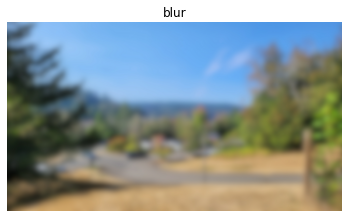

In [33]:
# Plot the training images
for i in data_images:
  plt.figure()
  show_image_data(i[0], 'blur')


In [19]:
# Read test - image data
test_data_images_blur = []
print("Number of training images: "+str(len(labels_training_data)))
for i in labels_training_data[12:]:
  print(i)
  
  #imgBlur
  print("Read image="+i[0])
  img = tf.io.read_file(i[0])
  imgBlur = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
  print(imgBlur.shape, imgBlur.dtype)
  test_data_images_blur.append(tf.convert_to_tensor(imgBlur))

  break # avoid using all the ram

test_data_images_blur = tf.convert_to_tensor(test_data_images_blur);
print("test_data_images_blur", test_data_images_blur.shape, test_data_images_blur.dtype)


Number of training images: 13
['train_data/blur/20220917_201156.jpg', 'train_data/hd/20220917_201156.jpg']
Read image=train_data/blur/20220917_201156.jpg
(1080, 1920, 3) <dtype: 'float32'>
test_data_images_blur (1, 1080, 1920, 3) <dtype: 'float32'>


Image shape: (1080, 1920, 3)
Number of test images 1


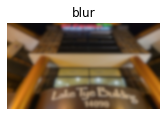

In [20]:
# Plot the first test image
plt.figure()
plt.subplot(1, 2, 1)
show_image_data(test_data_images_blur[0], 'blur')

print ("Number of test images", len(test_data_images_blur))

Image shape: (1080, 1920, 3)


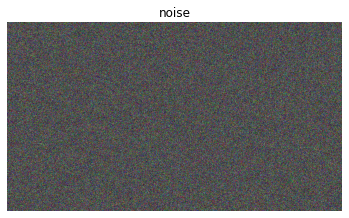

In [21]:
# Test assumption that training Y data affects model
assumption_data = [];
random_1 = tf.random.Generator.from_seed(42) # set the seed for reproducibility
for i in data_images_hd:
  #print("Generate data for", i.shape);
  data = random_1.normal(shape=i.shape)
  assumption_data.append(data)
assumption_data = tf.convert_to_tensor(assumption_data);
assumption_data.shape
show_image_data(assumption_data[0], 'noise')

In [22]:
# Test if Y_test data affects the outcome
Y_test = assumption_data
#Y_test = data_images_hd

# Set the global random seed
tf.random.set_seed(42)

# Create the model
import tensorflow as tf

model_1 = tf.keras.models.Sequential();

model_1.add(tf.keras.layers.Dense(3, input_shape=(1080, 1920, 3)))
model_1.add(tf.keras.layers.Dense(3, input_shape=(1080, 1920, 3), activation="relu"))
model_1.add(tf.keras.layers.Dense(3, input_shape=(1080, 1920, 3)))

#model_1.add(tf.keras.layers.Flatten())
#model_1.add(tf.keras.layers.Dense(100, input_shape=(1080, 1920, 3)))
#model_1.add(tf.keras.layers.Dense(100, input_shape=(1080, 1920, 3), activation="relu"))
#model_1.add(tf.keras.layers.Dense(3, input_shape=(1080, 1920, 3), activation="sigmoid"))
#model_1.add(tf.keras.layers.Dense(3, input_shape=(1080, 1920, 3)))

# Compile model
model_1.compile(loss="binary_crossentropy",
#model_1.compile(loss="mse",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#model_1.summary()

print ("Y_test.shape", Y_test.shape)

# Fit the model
history_1 = model_1.fit(data_images_blur, Y_test,
                        epochs=5)

Y_test.shape (5, 1080, 1920, 3)
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.0029 - accuracy: 0.3334
Epoch 2/5
1/1 [==============================] - 0s 235ms/step - loss: 0.0032 - accuracy: 0.3334
Epoch 3/5
1/1 [==============================] - 0s 233ms/step - loss: 0.0034 - accuracy: 0.3334
Epoch 4/5
1/1 [==============================] - 0s 177ms/step - loss: 0.0033 - accuracy: 0.3334
Epoch 5/5
1/1 [==============================] - 0s 170ms/step - loss: 0.0033 - accuracy: 0.3334


Image shape: (1080, 1920, 3)
Image shape: (1080, 1920, 3)


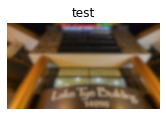

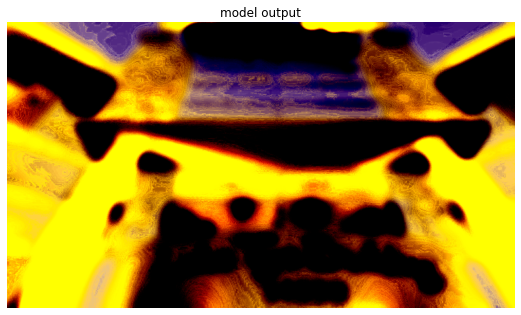

In [23]:
# Evaluate the model
preds = model_1.predict(test_data_images_blur)
preds[0].shape

# Plot the prediction image
plt.figure()
plt.subplot(1, 2, 1)
show_image_data(test_data_images_blur[0], 'test')
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 2)
#show_image_data(preds[0], 'model output')
#show_image_data(preds[0]*2, 'model output')
#show_image_data(preds[0]*5, 'model output')
#show_image_data(preds[0]*5+0.5, 'model output')
#show_image_data(preds[0]*8, 'model output')
show_image_data(preds[0]*15+0.75, 'model output')

Image shape: (1080, 1920, 3)
Image shape: (1080, 1920, 3)


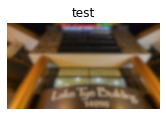

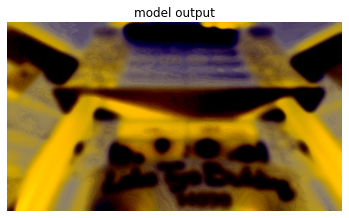

In [25]:
# Plot the prediction image

#print (preds[0])

plt.figure()
plt.subplot(1, 2, 1)
show_image_data(test_data_images_blur[0], 'test')
plt.figure()
#plt.subplot(1, 2, 2)
show_image_data(preds[0]*5+0.5, 'model output')